In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Internship_2023 /TRAIN',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Internship_2023 /VALIDATION',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 1860 files belonging to 3 classes.
Found 519 files belonging to 3 classes.


In [4]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
59/59 [==============================] - 499s 9s/step - loss: 7.0960 - accuracy: 0.5973 - val_loss: 37.4689 - val_accuracy: 0.3738
Epoch 2/15
59/59 [==============================] - 10s 155ms/step - loss: 3.1877 - accuracy: 0.7043 - val_loss: 15.5669 - val_accuracy: 0.4605
Epoch 3/15
59/59 [==============================] - 10s 157ms/step - loss: 2.2281 - accuracy: 0.7145 - val_loss: 12.8735 - val_accuracy: 0.3719
Epoch 4/15
59/59 [==============================] - 9s 139ms/step - loss: 1.3465 - accuracy: 0.7559 - val_loss: 4.7742 - val_accuracy: 0.3892
Epoch 5/15
59/59 [==============================] - 11s 179ms/step - loss: 1.0341 - accuracy: 0.8059 - val_loss: 6.0225 - val_accuracy: 0.3353
Epoch 6/15
59/59 [==============================] - 10s 158ms/step - loss: 0.8102 - accuracy: 0.8355 - val_loss: 6.0678 - val_accuracy: 0.4066
Epoch 7/15
59/59 [==============================] - 9s 137ms/step - loss: 0.5904 - accuracy: 0.8532 - val_loss: 1.7132 - val_accuracy: 0.5703


In [10]:
model.save("/content/drive/MyDrive/Internship_2023/fruit_detection.h5")

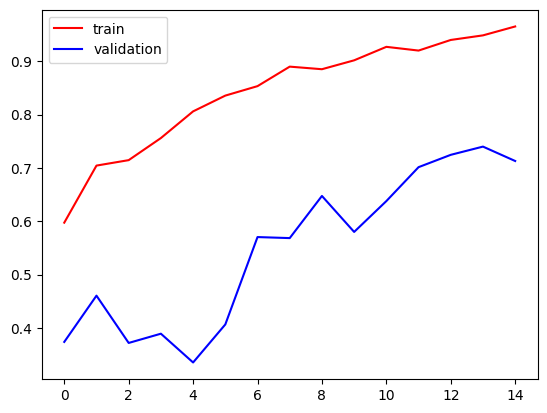

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

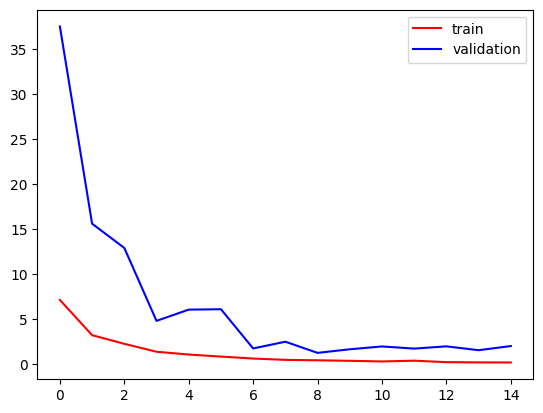

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2

In [14]:
test_image_1 = cv2.imread('/content/drive/MyDrive/Internship_2023 /dataset/Aloe Vera/aloevera101.jpg')

In [15]:
test_image_1.shape

(183, 275, 3)

In [16]:
test_image_1 = cv2.resize(test_image_1,(256,256))

In [17]:
test_input_1 = test_image_1.reshape((1,256,256,3))

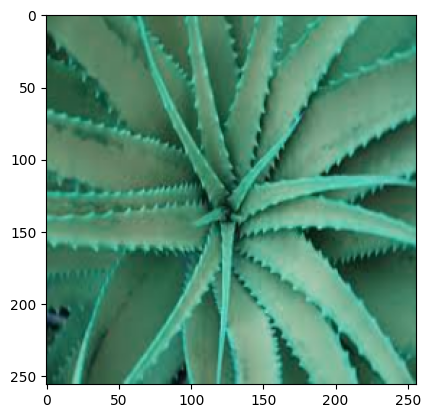

In [18]:
plt.imshow(test_image_1)

In [19]:
model.predict(test_input_1)

1/1 [==============================] - 0s 330ms/step


array([[0., 0., 1.]], dtype=float32)

In [20]:
test_image_2 = cv2.imread('/content/drive/MyDrive/Internship_2023 /dataset/Mango/mango108.jpg')

In [21]:
test_image_2.shape

(225, 225, 3)

In [22]:
test_image_2 = cv2.resize(test_image_2, (256, 256))

In [23]:
test_input_2 = test_image_2.reshape((1,256,256,3))

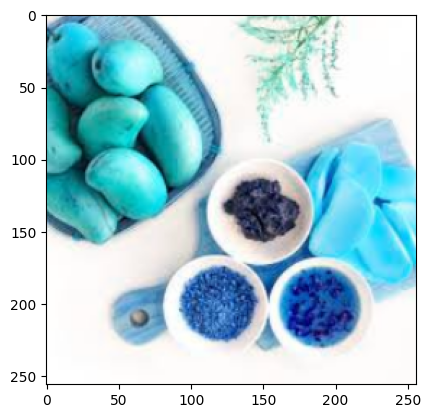

In [24]:
plt.imshow(test_image_2)

In [25]:
model.predict(test_input_2)

1/1 [==============================] - 0s 31ms/step


array([[0.0000000e+00, 8.5355826e-33, 1.0000000e+00]], dtype=float32)